In [229]:
import pandas as pd
import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [202]:

def get_ucop_dataset_facts(path, title_to_text_dict=None):
    '''
    function to get student opportunities out of ucop dataset
    '''
    df = pd.read_csv(path)
    
    # fill dict
    if title_to_text_dict is None:
        reader = csv.reader(open('../data/csv/ucop/ucop_title_to_text.csv', 'r'))
        title_to_text_dict = {}
        for row in reader:
            k, v = row
            title_to_text_dict[k] = v
    else:
        assert isinstance(title_to_text_dict, dict)
     
    # perform replacement to make distinction easier
    for index, item in enumerate(df['Title']):
        if item not in title_to_text_dict:
            if re.search('^STDT \d', item):
                df.at[index, 'Title'] = 'OTHER STUDENT TITLES'
        else:
            df.at[index, 'Title'] = title_to_text_dict[item]
    
    print(df['Title'][df['Title'].str.contains('STUDENT')].value_counts())
    
    count_student_jobs = df['Title'][df['Title'].str.contains('STUDENT')].count()
    count_total_jobs = df['Title'].count()
    median = pd.to_numeric(df['GrossPay'][df['Title'].str.contains('STUDENT')].str.replace(',','')).median()
    mean = pd.to_numeric(df['GrossPay'][df['Title'].str.contains('STUDENT')].str.replace(',','')).mean()
    min_gpay = pd.to_numeric(df['GrossPay'][df['Title'].str.contains('STUDENT')].str.replace(',','')).min()
    max_gpay = pd.to_numeric(df['GrossPay'][df['Title'].str.contains('STUDENT')].str.replace(',','')).max()
    std = pd.to_numeric(df['GrossPay'][df['Title'].str.contains('STUDENT')].str.replace(',','')).std()
    
    print(f"Total student titles:{count_student_jobs} out of {count_total_jobs}, {(count_student_jobs*100/count_total_jobs):.2f}%")
    print(f"Mean:{mean:.2f}, Median:{median:.2f}, Std:{std:.2f}")
    print(f"min:{min_gpay}, max:{max_gpay}")
    return (min_gpay, max_gpay, mean, median, std, count_student_jobs, count_total_jobs)

In [311]:
student_jobs_stats = {}
student_jobs_stats['student_avg_gpay'] = {}
student_jobs_stats['student_avg_gpay']['san_diego'] = []
student_jobs_stats['student_avg_gpay']['los_angeles'] = []
student_jobs_stats['student_avg_gpay']['berkeley'] = []

student_jobs_stats['student_med_gpay'] = {}
student_jobs_stats['student_med_gpay']['san_diego'] = []
student_jobs_stats['student_med_gpay']['los_angeles'] = []
student_jobs_stats['student_med_gpay']['berkeley'] = []

student_jobs_stats['percent_student_jobs'] = {}
student_jobs_stats['percent_student_jobs']['san_diego'] = []
student_jobs_stats['percent_student_jobs']['los_angeles'] = []
student_jobs_stats['percent_student_jobs']['berkeley'] = []

locations = ['san_diego', 'los_angeles', 'berkeley']
labels = ['2014', '2015','2016','2017','2018']

for location in locations:
    for year in labels:
        print(f"*************{location},{year}*************")
        path = '../data/csv/ucop/ucop_' + location + '_' + year + '_auto.csv'
        min_gpay, max_gpay, mean, median, std, count_student_jobs, count_total_jobs = get_ucop_dataset_facts(path)
        student_jobs_stats['student_avg_gpay'][location].append(int(mean))
        student_jobs_stats['student_med_gpay'][location].append(int(median))
        student_jobs_stats['percent_student_jobs'][location].append(count_student_jobs*100/count_total_jobs)
        print()

*************san_diego,2014*************
OTHER STUDENT TITLES           8016
GRADUATE STUDENT RESEARCHER    1841
ASSOCIATE-STUDENT                80
Name: Title, dtype: int64
Total student titles:9937 out of 38869, 25.57%
Mean:5878.22, Median:2992.00, Std:7336.36
min:9.0, max:63383.0

*************san_diego,2015*************
OTHER STUDENT TITLES           8320
GRADUATE STUDENT RESEARCHER    1845
ASSOCIATE-STUDENT                74
Name: Title, dtype: int64
Total student titles:10239 out of 39901, 25.66%
Mean:5763.85, Median:2952.00, Std:7218.50
min:12.0, max:50322.0

*************san_diego,2016*************
OTHER STUDENT TITLES           8680
GRADUATE STUDENT RESEARCHER    1880
ASSOCIATE-STUDENT                82
Name: Title, dtype: int64
Total student titles:10642 out of 41975, 25.35%
Mean:6217.36, Median:3296.00, Std:7658.09
min:2.0, max:60522.0

*************san_diego,2017*************
OTHER STUDENT TITLES           8967
GRADUATE STUDENT RESEARCHER    1970
ASSOCIATE-STUDENT         

In [302]:
for index,i in enumerate(student_jobs_stats['student_avg_gpay']['san_diego']):
    if index==0: 
        continue
    print((i - student_jobs_stats['student_avg_gpay']['san_diego'][index-1])*100/student_jobs_stats['student_avg_gpay']['san_diego'][index-1])

-1.9564477713507995
7.877841402047545
5.066752452951584
3.597672994488671


In [303]:
for index,i in enumerate(student_jobs_stats['student_avg_gpay']['los_angeles']):
    if index==0: 
        continue
    print((i - student_jobs_stats['student_avg_gpay']['los_angeles'][index-1])*100/student_jobs_stats['student_avg_gpay']['los_angeles'][index-1])

3.968910203406648
0.12724669953873072
5.607625099285147
11.793020457280385


In [304]:
for index,i in enumerate(student_jobs_stats['student_avg_gpay']['berkeley']):
    if index==0: 
        continue
    print((i - student_jobs_stats['student_avg_gpay']['berkeley'][index-1])*100/student_jobs_stats['student_avg_gpay']['berkeley'][index-1])

3.5370308867485885
4.538893344025662
5.369745320650506
4.0623179965055325


In [305]:
student_jobs_stats['student_avg_gpay']

{'san_diego': [5878, 5763, 6217, 6532, 6767],
 'los_angeles': [6047, 6287, 6295, 6648, 7432],
 'berkeley': [6022, 6235, 6518, 6868, 7147]}

In [280]:
def grouped_bar_plot(my_dict, labels, figsize, figname, title='', ylabel=''):
    plt.rcParams["figure.figsize"] = figsize
    width = 0.5  # the width of the bars

    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots()
    rects = []

    count_grouped_bars = len(my_dict.keys())
    for index,i in enumerate(my_dict.keys()):
        rects.append(ax.bar(x - (width/2 - (index * width/count_grouped_bars)), my_dict[i], width/count_grouped_bars, label=i))


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc="upper left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # for i in rects:
    #     autolabel(i)
    plt.grid()
    ax.set_axisbelow(True)
    fig.tight_layout()
    plt.savefig(figname)
    plt.show()

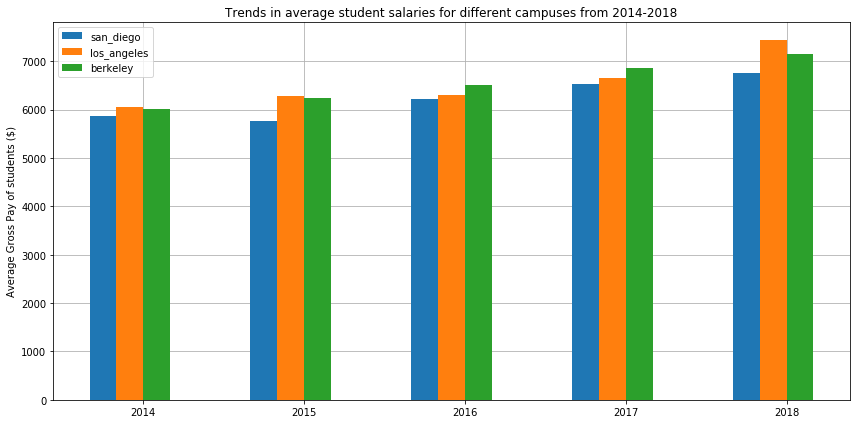

In [381]:
labels = ['2014', '2015','2016','2017','2018']
grouped_bar_plot(student_jobs_stats['student_avg_gpay'],
                    labels,
                    (12,6),
                    figname='student_avg_gpay_trends_3_campuses',
                    title='Trends in average student salaries for different campuses from 2014-2018',
                    ylabel='Average Gross Pay of students ($)')


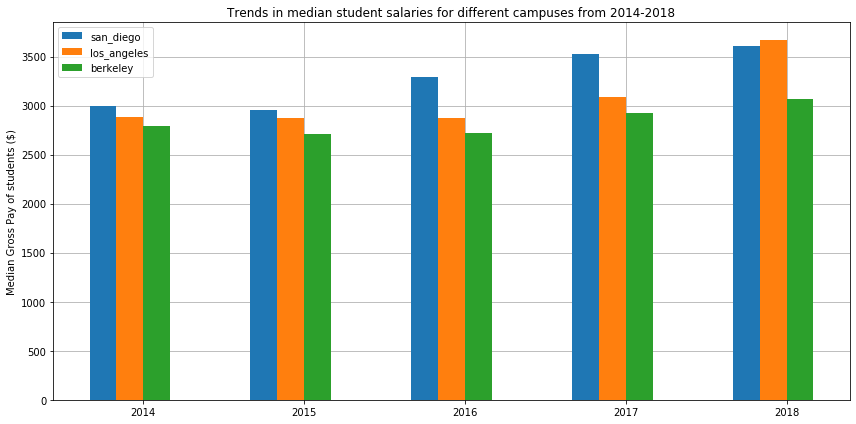

In [382]:
grouped_bar_plot(student_jobs_stats['student_med_gpay'],
                    labels,
                    (12,6),
                    figname='student_med_gpay_trends_3_campuses',
                    title='Trends in median student salaries for different campuses from 2014-2018',
                    ylabel='Median Gross Pay of students ($)')


In [290]:
def line_plots(my_dict, labels, figsize, figname, title='', ylabel=''):
    plt.rcParams["figure.figsize"] = figsize
    width = 0.5  # the width of the bars

    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots()

    for index,i in enumerate(my_dict.keys()):
        ax.plot(labels, my_dict[i], label=i)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    #ax.legend(loc="upper left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # for i in rects:
    #     autolabel(i)
    plt.grid()
    ax.set_axisbelow(True)
    fig.tight_layout()
    plt.savefig(figname)
    plt.show()

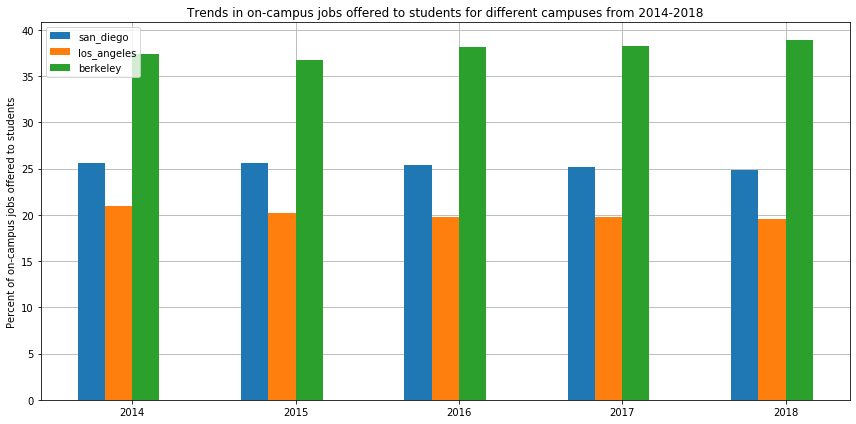

In [383]:
grouped_bar_plot(student_jobs_stats['percent_student_jobs'],
            labels,
            (12,6),
            figname='percent_student_jobs_trends_3_campuses',
            title='Trends in on-campus jobs offered to students for different campuses from 2014-2018',
            ylabel='Percent of on-campus jobs offered to students')

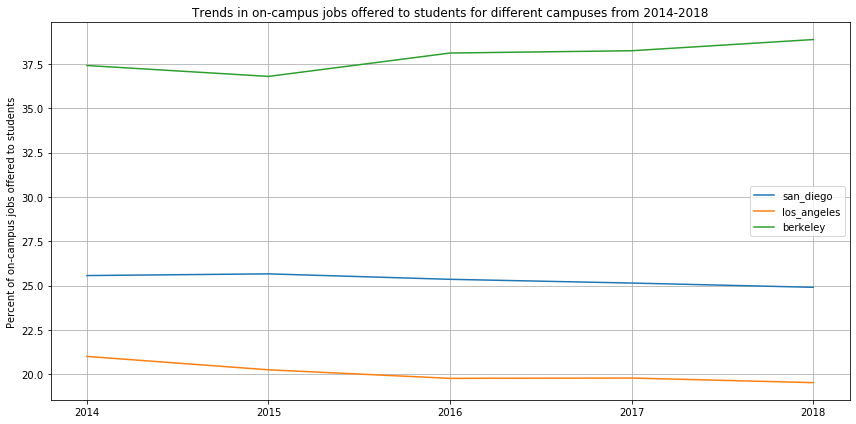

In [384]:
line_plots(student_jobs_stats['percent_student_jobs'],
            labels,
            (12,6),
            figname='percent_student_jobs_trends_3_campuses_line',
            title='Trends in on-campus jobs offered to students for different campuses from 2014-2018',
            ylabel='Percent of on-campus jobs offered to students')

In [360]:
locations = ['san_diego', 'los_angeles', 'berkeley']
labels = ['2014', '2015','2016','2017','2018']

prof_dict = {}
assoc_prof_dict = {}
asst_prof_dict = {}

properties = ['count', 'mean_gpay', 'median_gpay', 'std_gpay']
for item in properties:
    prof_dict[item] = {}
    assoc_prof_dict[item] = {}
    asst_prof_dict[item] = {}


for location in locations:
    for item in properties:
        prof_dict[item][location] = []
        assoc_prof_dict[item][location] = []
        asst_prof_dict[item][location] = []
        
    
    for year in labels:
        #print(f"*************{location},{year}*************")
        df = pd.read_csv('../data/csv/ucop/ucop_' + location + '_' + year + '_auto.csv', thousands=',')
        df_title_gpay = df[['Title','GrossPay']][df['Title'].str.contains('PROF')]
        prof_series = df_title_gpay['GrossPay']
        prof_dict['count'][location].append(prof_series.count())
        prof_dict['mean_gpay'][location].append(prof_series.mean())
        prof_dict['median_gpay'][location].append(prof_series.median())
        prof_dict['std_gpay'][location].append(prof_series.std())
        
        df_assoc_title_gpay = df_title_gpay[df_title_gpay['Title'].str.contains('ASSOC')]
        assoc_prof_series = df_assoc_title_gpay['GrossPay']
        assoc_prof_dict['count'][location].append(assoc_prof_series.count())
        assoc_prof_dict['mean_gpay'][location].append(assoc_prof_series.mean())
        assoc_prof_dict['median_gpay'][location].append(assoc_prof_series.median())
        assoc_prof_dict['std_gpay'][location].append(assoc_prof_series.std())
        
        df_asst_title_gpay = df_title_gpay[df_title_gpay['Title'].str.contains('ASST')]
        asst_prof_series = df_asst_title_gpay['GrossPay']
        asst_prof_dict['count'][location].append(asst_prof_series.count())
        asst_prof_dict['mean_gpay'][location].append(asst_prof_series.mean())
        asst_prof_dict['median_gpay'][location].append(asst_prof_series.median())
        asst_prof_dict['std_gpay'][location].append(asst_prof_series.std())
        

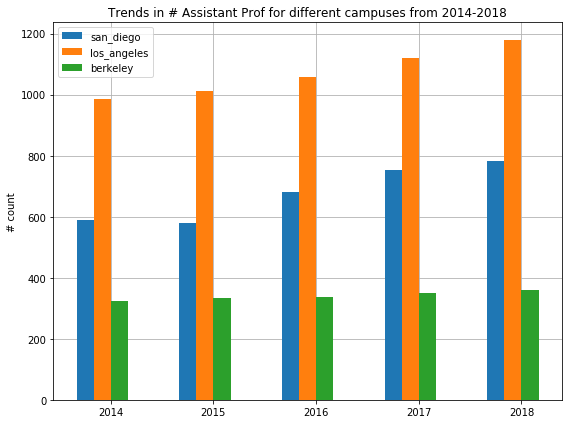

In [364]:
labels = ['2014', '2015','2016','2017','2018']
grouped_bar_plot(asst_prof_dict['count'],
                    labels,
                    (8,6),
                    figname='asst_prof_count_trends_3_campuses',
                    title='Trends in # Assistant Prof for different campuses from 2014-2018',
                    ylabel='# count')

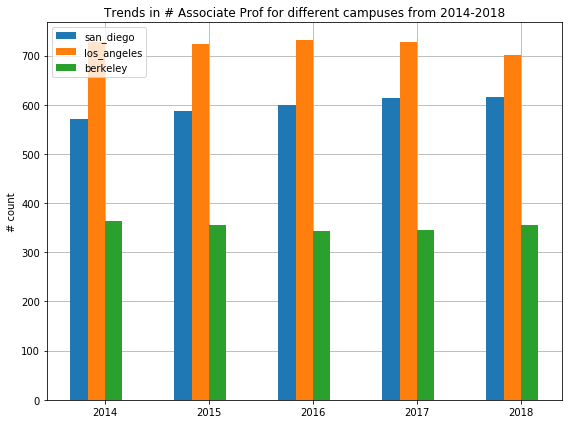

In [365]:
labels = ['2014', '2015','2016','2017','2018']
grouped_bar_plot(assoc_prof_dict['count'],
                    labels,
                    (8,6),
                    figname='assoc_prof_count_trends_3_campuses',
                    title='Trends in # Associate Prof for different campuses from 2014-2018',
                    ylabel='# count')

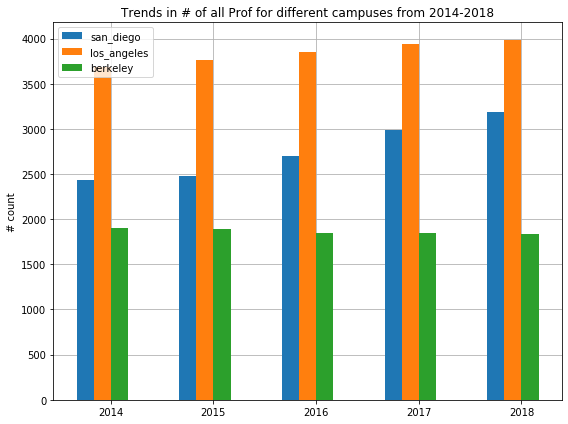

In [367]:
labels = ['2014', '2015','2016','2017','2018']
grouped_bar_plot(prof_dict['count'],
                    labels,
                    (8,6),
                    figname='prof_count_trends_3_campuses',
                    title='Trends in # of all Prof for different campuses from 2014-2018',
                    ylabel='# count')

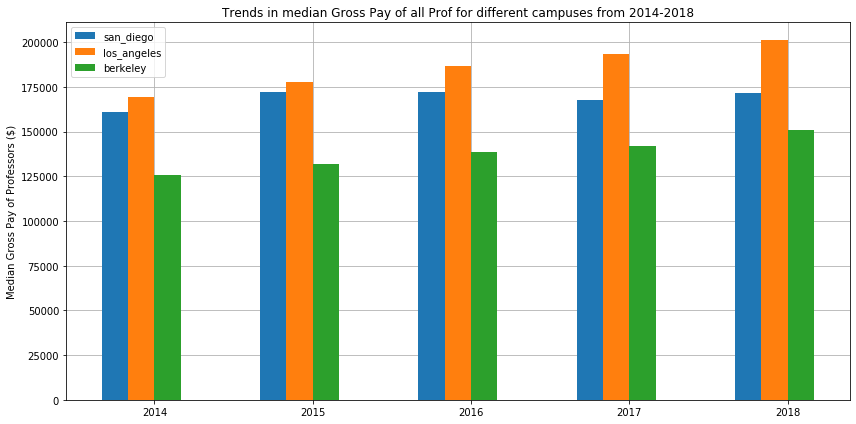

In [380]:
labels = ['2014', '2015','2016','2017','2018']
grouped_bar_plot(prof_dict['median_gpay'],
                    labels,
                    (12,6),
                    figname='prof_median_gpay_trends_3_campuses',
                    title='Trends in median Gross Pay of all Prof for different campuses from 2014-2018',
                    ylabel='Median Gross Pay of Professors ($)')

In [374]:
assoc_prof_dict['count']

{'san_diego': [572, 588, 599, 614, 615],
 'los_angeles': [728, 724, 731, 728, 702],
 'berkeley': [363, 356, 344, 346, 355]}

In [375]:
asst_prof_dict['count']

{'san_diego': [589, 579, 682, 752, 784],
 'los_angeles': [986, 1012, 1057, 1119, 1178],
 'berkeley': [324, 334, 336, 351, 361]}

In [377]:
asst_prof_dict['median_gpay']

{'san_diego': [116083.0, 118536.0, 119554.0, 123599.0, 140408.0],
 'los_angeles': [120168.5, 128350.5, 137297.0, 142756.0, 150591.0],
 'berkeley': [80468.0, 88804.5, 92158.0, 97064.0, 98030.0]}

In [378]:
assoc_prof_dict['median_gpay']

{'san_diego': [135883.5, 138471.5, 143294.0, 150253.0, 169009.0],
 'los_angeles': [133942.5, 146602.5, 154911.0, 168410.0, 182355.5],
 'berkeley': [106492.0, 109208.0, 116408.0, 123758.5, 130225.0]}